<a href="https://colab.research.google.com/github/manasdesai/QSTP-2022_Intro-to-Deep-Learning/blob/main/QSTP_Week3_FeedForward_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001


In [ ]:
# MNIST dataset 
train_dataset = torchvision.datasets.FashionMNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

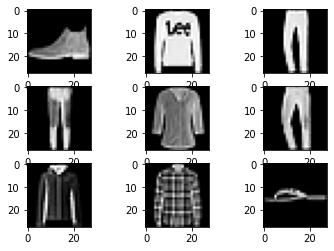

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()


In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out


In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/600], Loss: 0.5356
Epoch [1/10], Step [200/600], Loss: 0.3948
Epoch [1/10], Step [300/600], Loss: 0.5811
Epoch [1/10], Step [400/600], Loss: 0.3107
Epoch [1/10], Step [500/600], Loss: 0.3974
Epoch [1/10], Step [600/600], Loss: 0.4926
Epoch [2/10], Step [100/600], Loss: 0.2081
Epoch [2/10], Step [200/600], Loss: 0.3654
Epoch [2/10], Step [300/600], Loss: 0.2265
Epoch [2/10], Step [400/600], Loss: 0.4271
Epoch [2/10], Step [500/600], Loss: 0.4184
Epoch [2/10], Step [600/600], Loss: 0.2814
Epoch [3/10], Step [100/600], Loss: 0.3122
Epoch [3/10], Step [200/600], Loss: 0.3662
Epoch [3/10], Step [300/600], Loss: 0.2995
Epoch [3/10], Step [400/600], Loss: 0.2454
Epoch [3/10], Step [500/600], Loss: 0.2939
Epoch [3/10], Step [600/600], Loss: 0.4992
Epoch [4/10], Step [100/600], Loss: 0.3021
Epoch [4/10], Step [200/600], Loss: 0.4190
Epoch [4/10], Step [300/600], Loss: 0.2795
Epoch [4/10], Step [400/600], Loss: 0.2604
Epoch [4/10], Step [500/600], Loss: 0.3626
Epoch [4/10

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 88.52 %
